In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv('./archive/Sample - Superstore.csv',encoding_errors='ignore')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
# filling null values
df['Postal Code'].fillna(0,inplace=True)

In [15]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int32  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [17]:
# Checking info duplicates
if df.duplicated().sum() > 0:
    print('Duplicates exist')
else:
    print('No Duplicates Found')

No Duplicates Found


In [23]:
# types of customers
type_of_customers = df['Segment'].unique()
type_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [30]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Type of Customer'})
number_of_customers

,Type of Customer,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


([<matplotlib.patches.Wedge at 0x225fec843d0>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

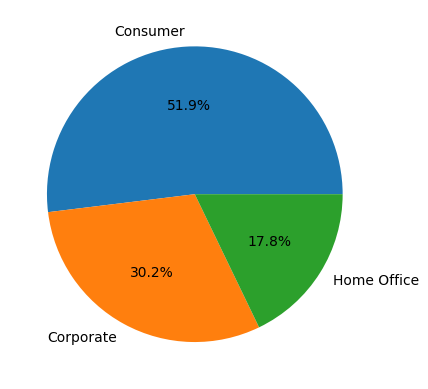

In [40]:
plt.pie(number_of_customers['count'],labels=number_of_customers['Type of Customer'],autopct='%1.1f%%')

In [42]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment':'Type of Customer',
                                                      'Sales':'Total Sales'})
sales_per_segment

,Type of Customer,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


<BarContainer object of 3 artists>

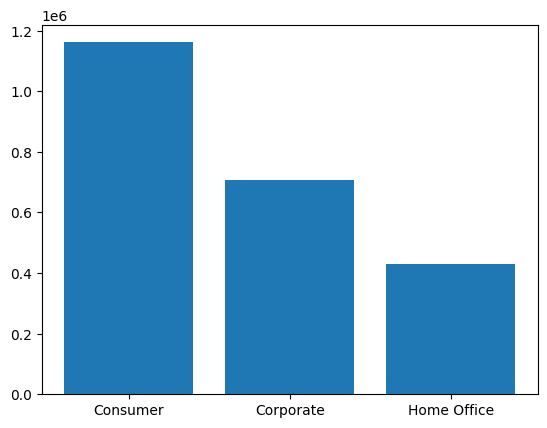

In [43]:
plt.bar(sales_per_segment['Type of Customer'],sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x225fed8ce90>,
 [Text(-0.019255774590196492, 1.0998314485160587, 'Consumer'),
  Text(-0.5936661576864369, -0.9260456215639825, 'Corporate'),
  Text(0.9155113363994682, -0.609786022243918, 'Home Office')],
 [Text(-0.010503149776470813, 0.599908062826941, '50.6%'),
  Text(-0.3238179041926019, -0.5051157935803541, '30.7%'),
  Text(0.4993698198542553, -0.33261055758759156, '18.7%')])

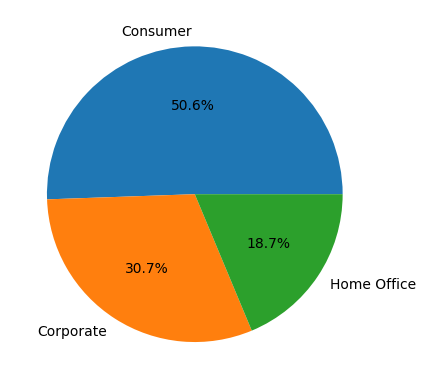

In [45]:
plt.pie(sales_per_segment['Total Sales'],labels=sales_per_segment['Type of Customer'],autopct='%1.1f%%')

In [46]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [64]:
customers_order_frequency =df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customers_order_frequency

,Customer ID,Customer Name,Segment,Order ID
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [65]:
customers_order_frequency=customers_order_frequency.rename(columns={'Order ID':'Total Orders'})
customers_order_frequency

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [69]:
repeat_customers_sorted = customers_order_frequency.sort_values(by='Total Orders',ascending=False)
print(repeat_customers_sorted.reset_index().head(5))

   index Customer ID  Customer Name      Segment  Total Orders
0    787    WB-21850  William Brown     Consumer            37
1    606    PP-18955     Paul Prost  Home Office            34
2    387    JL-15835       John Lee     Consumer            34
3    482    MA-17560   Matt Abelman  Home Office            34
4    720    SV-20365    Seth Vernon     Consumer            32


In [71]:
customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
customer_sales

,Customer ID,Customer Name,Segment,Sales
0,AA-10315,Alex Avila,Consumer,5563.560
1,AA-10375,Allen Armold,Consumer,1056.390
2,AA-10480,Andrew Allen,Consumer,1790.512
3,AA-10645,Anna Andreadi,Consumer,5086.935
4,AB-10015,Aaron Bergman,Consumer,886.156
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658
789,YC-21895,Yoseph Carroll,Corporate,5454.350
790,YS-21880,Yana Sorensen,Corporate,6720.444
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707


In [73]:
customer_sales = customer_sales.sort_values(by='Sales',ascending=False).reset_index().head(12)
customer_sales

,index,Customer ID,Customer Name,Segment,Sales
0,700,SM-20320,Sean Miller,Home Office,25043.050
1,741,TC-20980,Tamara Chand,Corporate,19052.218
2,621,RB-19360,Raymond Buch,Consumer,15117.339
3,730,TA-21385,Tom Ashbrook,Home Office,14595.620
4,6,AB-10105,Adrian Barton,Consumer,14473.571
5,434,KL-16645,Ken Lonsdale,Consumer,14175.229
6,669,SC-20095,Sanjit Chand,Consumer,14142.334
7,327,HL-15040,Hunter Lopez,Consumer,12873.298
8,683,SE-20110,Sanjit Engle,Consumer,12209.438
9,131,CC-12370,Christopher Conant,Consumer,12129.072


In [82]:
df['Ship Mode'].head(20)

0       Second Class
1       Second Class
2       Second Class
3     Standard Class
4     Standard Class
5     Standard Class
6     Standard Class
7     Standard Class
8     Standard Class
9     Standard Class
10    Standard Class
11    Standard Class
12    Standard Class
13    Standard Class
14    Standard Class
15    Standard Class
16    Standard Class
17      Second Class
18      Second Class
19      Second Class
Name: Ship Mode, dtype: object

In [78]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model

,Ship Mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [84]:
shipping_model = shipping_model.rename(columns={'count':'Use Frequency',
                                                'Ship Mode':'Mode of Shipment'})
shipping_model

,Mode of Shipment,Use Frequency
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


([<matplotlib.patches.Wedge at 0x22584ece0d0>,
 [Text(-0.33056573952035373, 1.0491550370919267, 'Standard Class'),
  Text(-0.37607764230951635, -1.0337144707098356, 'Second Class'),
  Text(0.7465348771572817, -0.8078896441889587, 'First Class'),
  Text(1.0840144265772789, -0.18684946607452133, 'Same Day')],
 [Text(-0.1803085851929202, 0.5722663838683235, '59.7%'),
  Text(-0.20513325944155433, -0.5638442567508194, '19.5%'),
  Text(0.40720084208579, -0.4406670786485229, '15.4%'),
  Text(0.5912805963148793, -0.10191789058610252, '5.4%')])

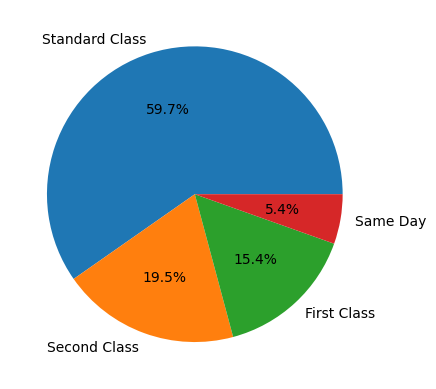

In [88]:
plt.pie(shipping_model['Use Frequency'],labels=shipping_model['Mode of Shipment'],autopct='%1.1f%%')

In [94]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'count':'Number of customers'})
state_sorted =state.sort_values(by='Number of customers',ascending=False)
state_sorted.head(5)

,State,Number of customers
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [98]:
city = df['City'].value_counts().reset_index()
city

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Glenview,1
527,Missouri City,1
528,Rochester Hills,1
529,Palatine,1


In [101]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by='Sales',ascending=False)
top_sales.head(10)

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


In [108]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Sales',ascending=False)
top_city_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


In [109]:
products = df['Category'].unique()
products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [110]:
product_subcategory = df['Sub-Category'].unique()
product_subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [121]:
products_group = df.groupby('Category')['Sub-Category'].nunique().reset_index()
products_group = products_group.sort_values(by='Sub-Category',ascending=False)
products_group

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


<BarContainer object of 17 artists>

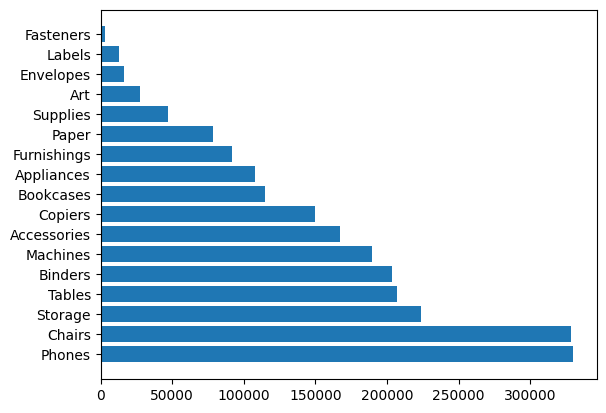

In [138]:
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
subcategory_count_sales.head(5)
plt.barh(subcategory_count_sales['Sub-Category'],subcategory_count_sales['Sales'])

([<matplotlib.patches.Wedge at 0x225851a0510>,
 [Text(0.45585027961816843, 1.00109965666363, 'Technology'),
  Text(-1.0859233062515894, -0.17541542959391293, 'Furniture'),
  Text(0.609660527768593, -0.9155949109081596, 'Office Supplies')],
 [Text(0.2486456070644555, 0.5460543581801618, '36.4%'),
  Text(-0.5923218034099578, -0.0956811434148616, '32.3%'),
  Text(0.3325421060555962, -0.4994154059499052, '31.3%')])

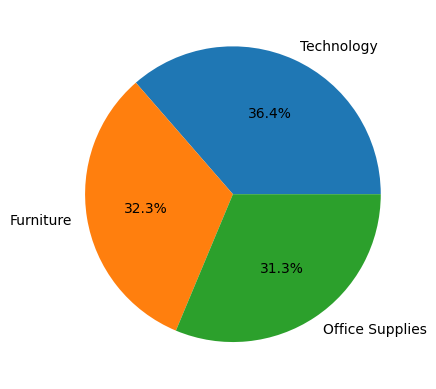

In [133]:
product_category = df.groupby('Category')['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales',ascending=False)
plt.pie(top_product_category['Sales'],labels=top_product_category['Category'],autopct='%1.1f%%')

In [150]:
pd.to_datetime(df['Order Date'],dayfirst=False)

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [151]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=False)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year',
                                            'Sales':'total sales'})
yearly_sales


,Year,total sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


<BarContainer object of 4 artists>

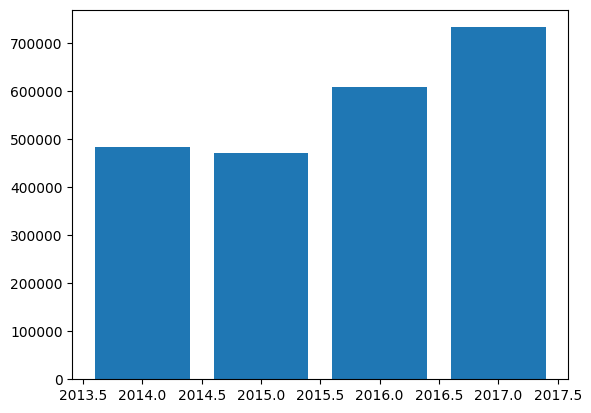

In [153]:
plt.bar(yearly_sales['Year'],yearly_sales['total sales'])

(array([2013.5, 2014. , 2014.5, 2015. , 2015.5, 2016. , 2016.5, 2017. ,
        2017.5]),
 [Text(2013.5, 0, '2013.5'),
  Text(2014.0, 0, '2014.0'),
  Text(2014.5, 0, '2014.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2015.5, 0, '2015.5'),
  Text(2016.0, 0, '2016.0'),
  Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5')])

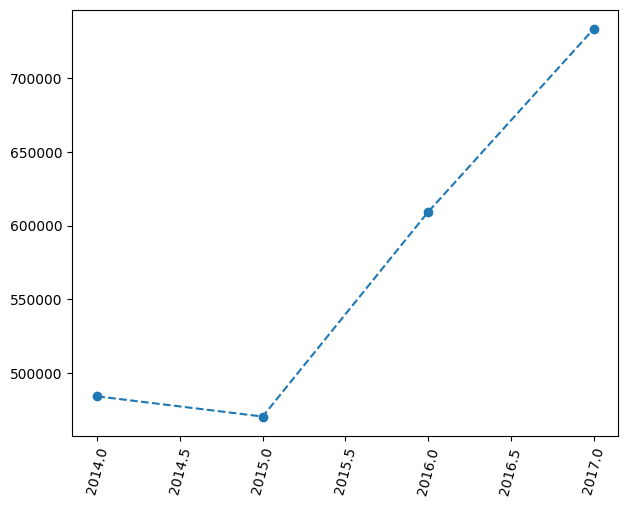

In [161]:
plt.plot(yearly_sales['Year'],yearly_sales['total sales'],marker='o',linestyle='--')
plt.tight_layout()
plt.xticks(rotation=75)


In [163]:
import plotly.express as px
df_summary = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
fig = px.sunburst(
    df_summary,path=['Category','Sub-Category'],values='Sales'
    )
fig.show()